The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 2/2 [00:12<00:00,  6.03s/it]


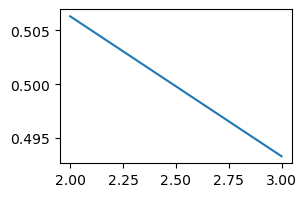

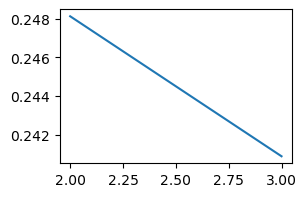

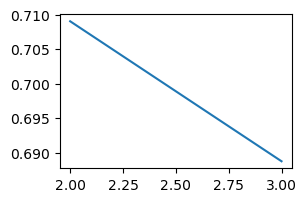

In [115]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
#model and 
from utils import *
from tqdm import tqdm
from models import MSE,MDcR,DSE,MVBG,CPCA,DPCA,MVP,LPP,LE
import scipy
datasets_names = ['BBC','MSRC-v1','NGs','Reuters','YALE']
datasets_names = ['MSRC-v1','NGs','YALE']

for dt_name in datasets_names:
    X,labels=read_data(f'datasets/data sets/{dt_name}.mat')
    X = [X[0,i].T for  i  in range(X.shape[1])]
    if isinstance(X[0],scipy.sparse._csr.csr_matrix):
        X =   [x.todense() for x in X]
    labels  = labels.squeeze()
    k = len(set(labels))
    #models
    model_MSE = MSE()
    model_MDcR = MDcR()
    model_DSE = DSE()
    model_MVBG = MVBG(0.1,2,0.1)
    model_CPCA = CPCA()
    model_DPCA = DPCA()
    model_MVP =  MVP()
    model_LPP   =   LPP()
    model_LE = LE()
    #main 
    res_nmi = []
    d_range  = range(2,4)
    for d_ in tqdm(d_range): 
        nmi_list = []
        for i in range(5):
            # train_test split
            train_idx,test_idx = random_index(X[0].shape[1],0.8)
            X_train = [x[:,train_idx] for x in X]
            X_test = [x[:,test_idx] for x in X]
            y_test = labels[test_idx]
            #train
            model = model_LE
            # pred =  model.predict(X_test,0.5,2,1e6,d_,k,10) #MVP
            # pred   = model.predict(X_train,X_test,1e8,d_,k,100) #lPP
            pred  = model.predict(X_train,X_test,d_,20,k) #LE ok

            # criterion
            from sklearn.metrics.cluster import normalized_mutual_info_score
            nmi = normalized_mutual_info_score(y_test,pred)
            nmi_list.append(nmi)
        nmi = np.mean(nmi_list)
        res_nmi.append(nmi)
    np.save(f'./result/{dt_name}/{model.name}.npy',res_nmi)
    #plot
    import matplotlib.pyplot as plt
    plt.figure(figsize=(3,2))
    plt.plot(d_range,res_nmi)


In [106]:
import scipy
a,b = read_data('datasets/data sets/BBC.mat')
mats = [a[0,i].T for i in range(a.shape[1])]
print(type(mats[0]))
a =mats[0]
# np.diag(a)
print(a.shape)
# a =  np.array([1,2,3]).todense()
isinstance(a, scipy.sparse._csr.csr_matrix)

<class 'scipy.sparse._csr.csr_matrix'>
(4659, 685)


True

In [ ]:
# np.save('./result/NGs/mvbg_nmi.npy',res_nim)
# res_nmi = np.load('./result/NGs/mvbg_nmi.npy')
# res_nmi
from PIL import Image
img = Image.open('101_0108.JPG')
data = np.asarray(img)
h,w,c = data.shape
data = data.reshape(h*w,c)
data[0]

In [ ]:
#MVBG
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
#model and 
from utils import *
from tqdm import tqdm
from models import MSE,MDcR,DSE,MVBG,PCA
from sklearn.metrics.cluster import normalized_mutual_info_score
X,labels=read_data('datasets/data sets/NGs.mat')
X = [X[0,i].T for  i  in range(X.shape[1])]
labels  = labels.squeeze()

d_range = (10,12)
model_mvbg = MVBG(0.1,2,0.1)
res_nmi = []
for d_ in d_range:
    nmi_list=[]
    for _ in range(1):
        dim_emb = model_mvbg.mvbg(X,100,d_,10)
        pred =kmeans(dim_emb,7)
        nmi_temp = normalized_mutual_info_score(labels, pred)
        nmi_list.append(nmi_temp)
    nmi = np.mean(nmi_list)
    res_nmi.append(nmi)
print(res_nmi)

In [ ]:
#DSE 單獨
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

from utils import *
from tqdm import tqdm
X,labels=read_data('datasets/data sets/YALE.mat')
X = [X[0,i].T for  i  in range(X.shape[1])]
labels  = labels.squeeze()

from models import DSE
model_DSE = DSE()
nmi_list=[]

for _ in tqdm(range(20)):

    pred = model_DSE.dse(X,7,2,500)
    from sklearn.metrics.cluster import normalized_mutual_info_score
    nmi = normalized_mutual_info_score(labels,pred)
    # print(nmi)
    nmi_list.append(nmi)
print(np.mean(nmi_list))

In [ ]:
labels.shape

In [ ]:
x=np.random.rand(3,4)
np.exp(x)/np.exp(x).sum(1).reshape(3,-1)